# A CHANGER

1. [Step 1: Packages and loading](#1)
    - Import Libraries
1. [Step 2: Data Preparation](#2)
    - Meet the Data
1. [The 4 C's of Data Cleaning: Correcting, Completing, Creating, and Converting](#3)
    - Clean Data
    - Convert Formats
    - Split Training and Testing Data
1. [Step 4: Exploratory Analysis](#4)
1. [Step 5: Machine Learning](#5)
    - Metrics used : Accuracy
    - Metrics used : AUC
1. [Step 6: Ensembling and tuning](#6)
    - LightGBM
    - XGBoost
    - Gradient Boosting
1. [Step 7 : Producing the Submission file](#7)
1. [Conclusion](#8)

<a id="1"></a> <br>
## Step 1: Packages and loading

**Import Libraries**

In [23]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python

#load packages
import sys #access to system parameters https://docs.python.org/3/library/sys.html
print("Python version: {}". format(sys.version))

import pandas as pd #collection of functions for data processing and analysis modeled after R dataframes with SQL like features
print("pandas version: {}". format(pd.__version__))

import matplotlib #collection of functions for scientific and publication-ready visualization
print("matplotlib version: {}". format(matplotlib.__version__))

import numpy as np #foundational package for scientific computing
print("NumPy version: {}". format(np.__version__))

import scipy as sp #collection of functions for scientific computing and advance mathematics
print("SciPy version: {}". format(sp.__version__)) 

import IPython
from IPython import display #pretty printing of dataframes in Jupyter notebook
print("IPython version: {}". format(IPython.__version__)) 

import sklearn #collection of machine learning algorithms
print("scikit-learn version: {}". format(sklearn.__version__))

#misc libraries
import random
import time


#ignore warnings
import warnings
warnings.filterwarnings('ignore')
print('-'*25)



# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output


# Any results you write to the current directory are saved as output.


Python version: 3.7.3 (default, Apr 24 2019, 15:29:51) [MSC v.1915 64 bit (AMD64)]
pandas version: 0.25.3
matplotlib version: 3.2.1
NumPy version: 1.18.1
SciPy version: 1.4.1
IPython version: 7.12.0
scikit-learn version: 0.22
-------------------------


**Load Data Modelling Libraries**

In [24]:
#Common Model Algorithms
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from xgboost import XGBClassifier

#Common Model Helpers
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics

#Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
from pandas.plotting import scatter_matrix

#Configure Visualization Defaults
#%matplotlib inline = show plots in Jupyter Notebook browser
%matplotlib inline
mpl.style.use('ggplot')
sns.set_style('white')
pylab.rcParams['figure.figsize'] = 12,8


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()


from sklearn.model_selection import train_test_split

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
import sklearn.model_selection as ms
from lightgbm import LGBMClassifier
import xgboost as xgb
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import StratifiedKFold

from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression


from sklearn import tree
from sklearn import metrics
from sklearn import ensemble
from sklearn import linear_model 
from sklearn import naive_bayes 

from sklearn.base import BaseEstimator
from sklearn.base import TransformerMixin
from sklearn.pipeline import FeatureUnion

from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import SGDClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

import missingno as msno
from sklearn.impute import SimpleImputer


import sys

if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

<a id="2"></a> <br>
## Step 2: Data Preparation

**Meet the Data**

To begin this step, we first import our data.  Click here for the [Source Data Dictionary](https://www.kaggle.com/c/titanic/data).

1. The *Survived* variable is our outcome or dependent variable. It is a binary nominal datatype of 1 for survived and 0 for did not survive. All other variables are potential predictor or independent variables. **It's important to note, more predictor variables do not make a better model, but the right variables could make the difference.**
2. The *PassengerID* and *Ticket* variables are assumed to be random unique identifiers, that have no impact on the outcome variable. Thus, they will be excluded from analysis.
3. The *Pclass* variable is an ordinal datatype for the ticket class, a proxy for socio-economic status (SES), representing 1 = upper class, 2 = middle class, and 3 = lower class.
4. The *Name* variable is a nominal datatype. It could be used in feature engineering to derive the gender from title, family size from surname, and SES from titles like doctor or master. Since these variables already exist, we'll make use of it to see if title, like master, makes a difference.
5. The *Sex* and *Embarked* variables are a nominal datatype. They will be converted to dummy variables for mathematical calculations.
6. The *Age* and *Fare* variable are continuous quantitative datatypes.
7. The *SibSp* represents number of related siblings/spouse aboard and *Parch* represents number of related parents/children aboard. Both are discrete quantitative datatypes. This can be used for feature engineering to create a family size and is alone variable.
8. The *Cabin* variable is a nominal datatype that can be used in feature engineering for approximate position on ship when the incident occurred and SES from deck levels. However, since there are many null values, it does not add value and thus is excluded from analysis.

In [27]:
data_raw = pd.read_csv('train.csv')

data_val  = pd.read_csv('test.csv')

data1 = data_raw.copy(deep = True)

data_cleaner = [data1, data_val]

print (data_raw.info())
data_raw.head(10)

data_raw = data_raw.loc[data_raw['Age'] < 50]
data_raw

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


<a id="3"></a> <br>
## The 4 C's of Data Cleaning: Correcting, Completing, Creating, and Converting

In this stage, we will clean our data by :

- 1) correcting aberrant values and outliers
- 2) completing missing information
- 3) creating new features for analysis
- 4) converting fields to the correct format for calculations and presentation.

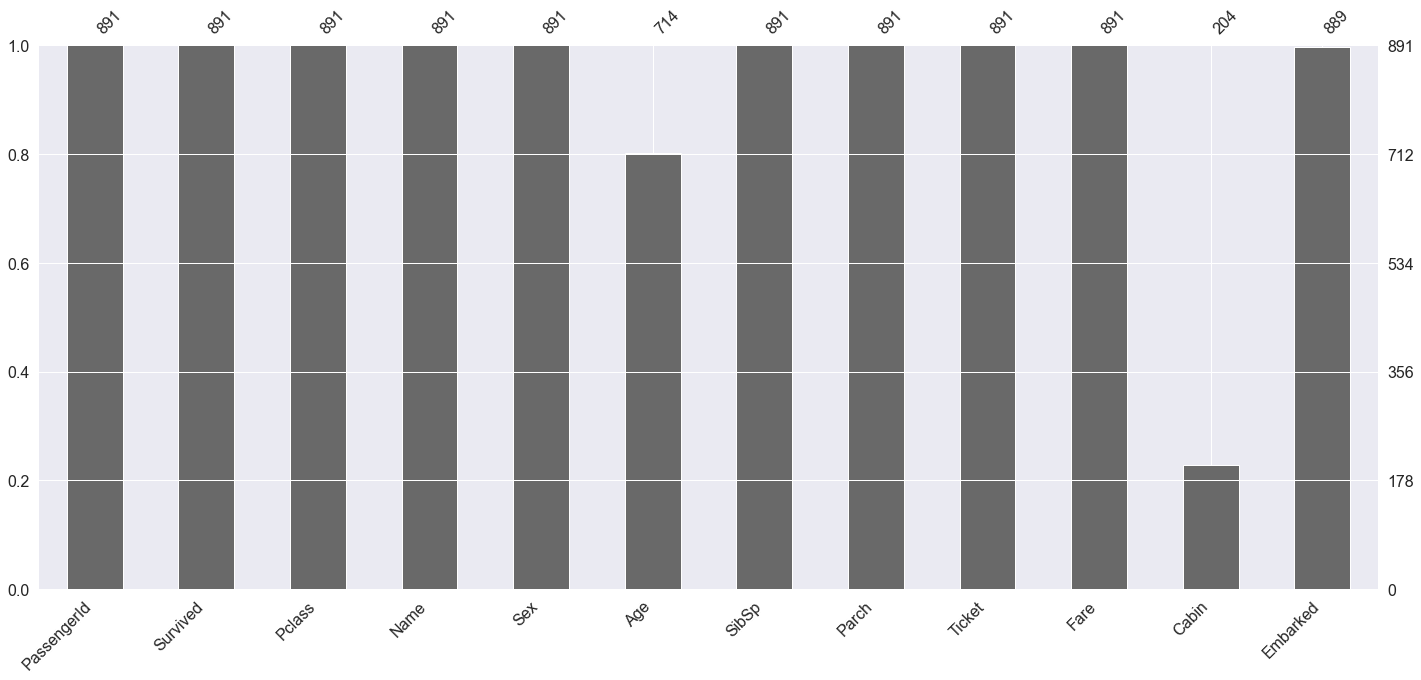

In [5]:
msno.bar(data_raw);

The bar chart above gives a quick graphical overview of the completeness of the dataset. We can see that Age, Cabin and embarked columns have missing values. Next,it would make sense to find out the locations of the missing data.

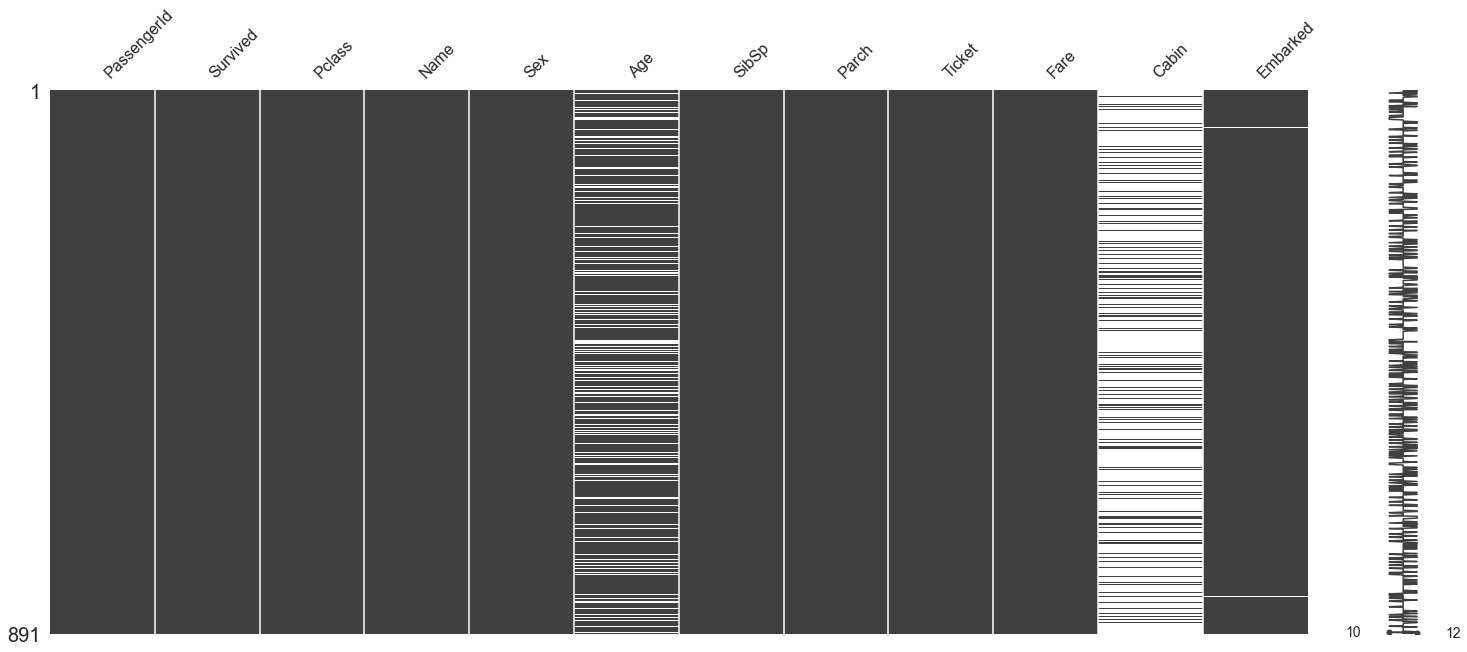

In [7]:
msno.matrix(data_raw);

The plot appears blank(white) wherever there are missing values. For instance, in Embarked column there are only two instances of missing data, hence the two white lines.

The sparkline on the right gives an idea of the general shape of the completeness of the data and points out the row with the minimum nullities and the total number of columns in a given dataset, at the bottom.

The missingno package also let's us sort the graph by a particluar column. Let's sort the values by Age and Cabin column to see if there is a pattern in the missing values

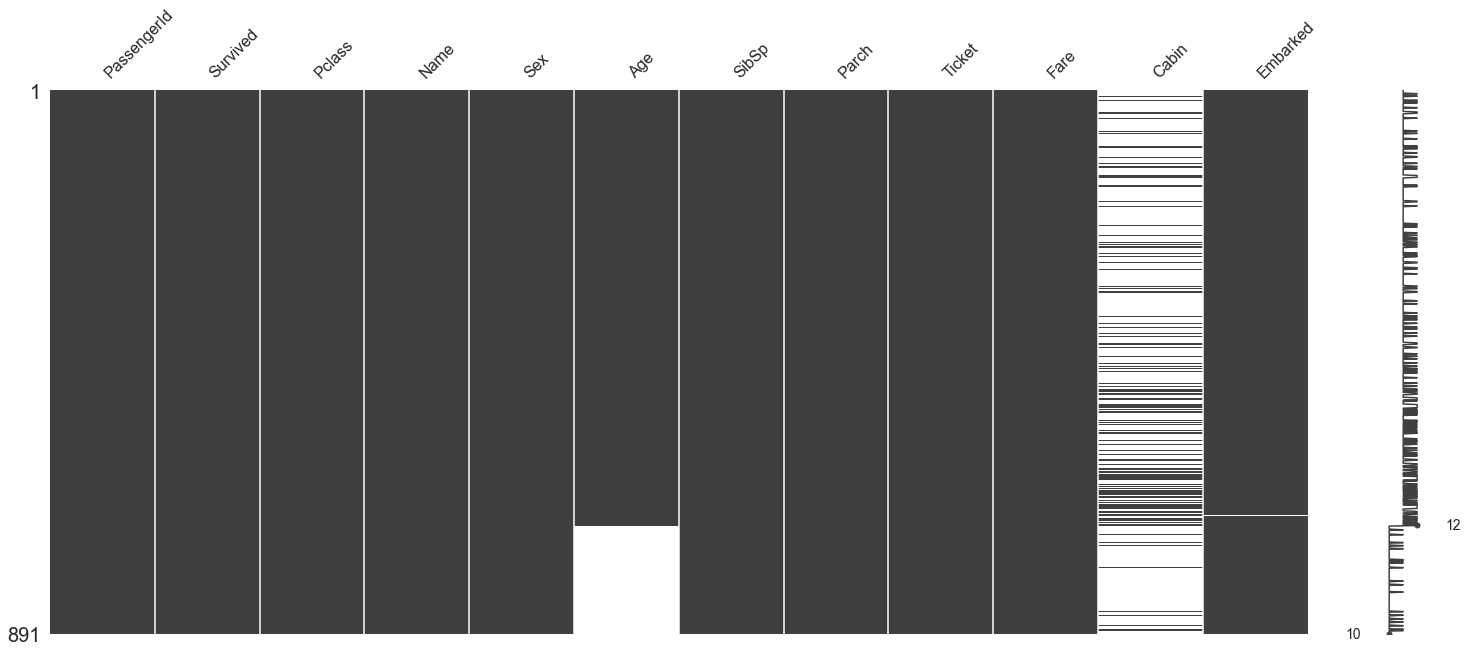

In [9]:
sorted = data_raw.sort_values('Age')

msno.matrix(sorted);

Hence it is clear that here is no relation between the missingness in Age and Cabin column.To cement this conclusion further we can also draw a Heatmap among the different variables in the dataset.

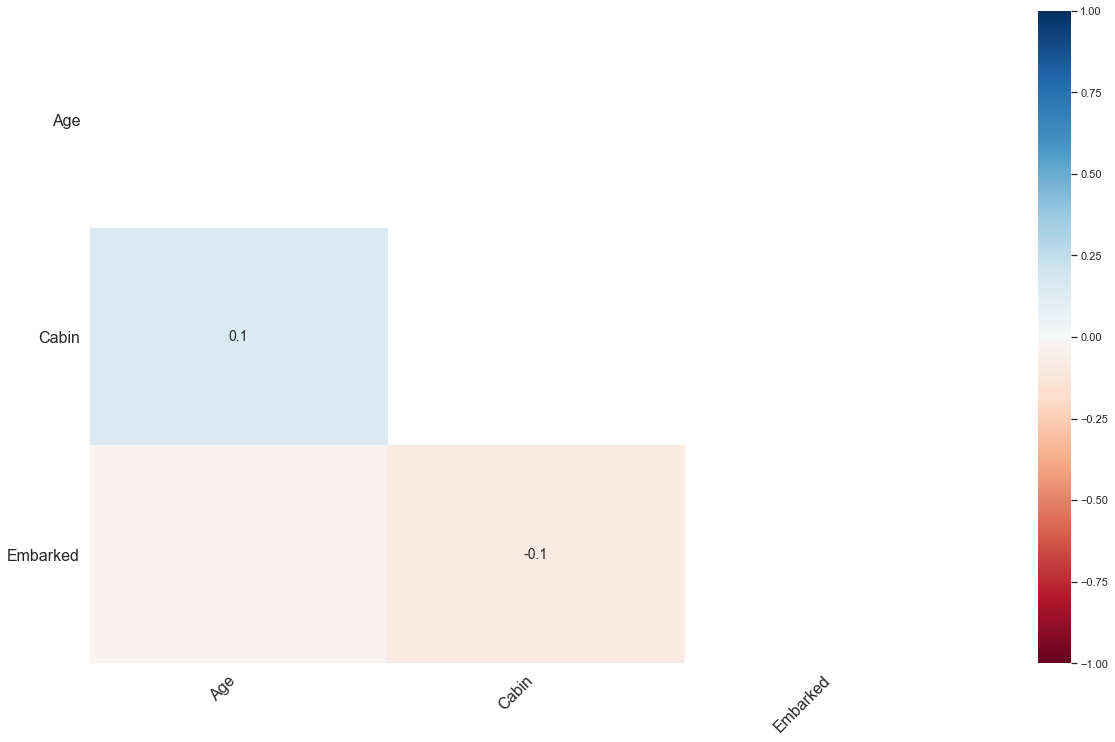

In [10]:
msno.heatmap(data_raw);

The heatmap function shows that there are no strong correlations between missing values of different features.

Let's dive more in depth with Dendogram. A dendogram is a tree diagram of missingness. It groups the highly correlated variables together.

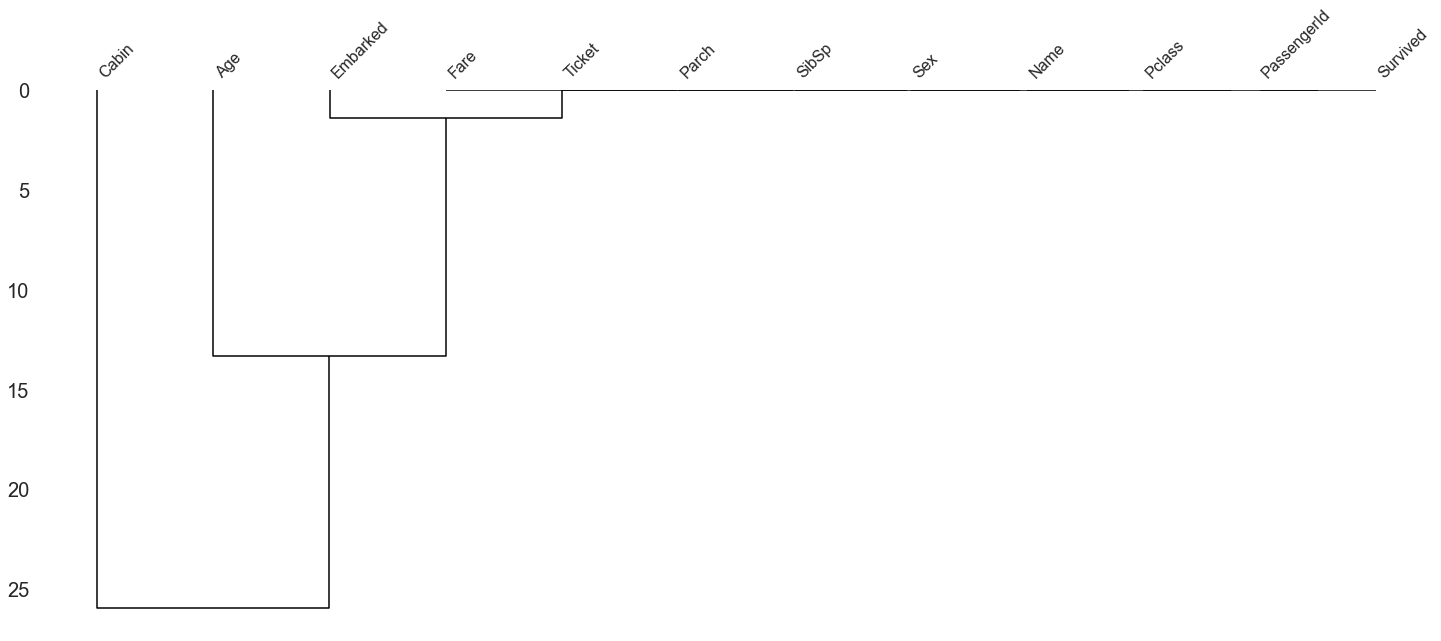

In [13]:
msno.dendrogram(data_raw);

Cluster leaves which linked together at a distance of zero fully predict one another's presence—one variable might always be empty when another is filled, or they might always both be filled or both empty, and so on(missingno documentation)

the missingness of Embarked tends to be more similar to Age than to Cabin and so on.However, in this particluar case, the correlation is high since Embarked column has a very few missing values.

This dataset doesn't have much missing values but if you use the same methodology on datasets having a lot of missing values, some interesting pattern will definitely emerge.

I will use here ppscore,  it's a Python implementation of the Predictive Power Score (PPS). The PPS is an asymmetric, data-type-agnostic score that can detect linear or non-linear relationships between two columns. The score ranges from 0 (no predictive power) to 1 (perfect predictive power). It can be used as an alternative to the correlation (matrix).

In [13]:
import ppscore as pps

def heatmap(df):
    plt.figure(figsize = (15,10))
    ax = sns.heatmap(df, vmin=0, vmax=1, cmap="Blues", linewidths=0.5, annot=True)
    ax.set_title('PPS matrix')
    ax.set_xlabel('feature')
    ax.set_ylabel('target')
    return ax


def corr_heatmap(df):
    ax = sns.heatmap(df, vmin=-1, vmax=1, cmap="BrBG", linewidths=0.5, annot=True)
    ax.set_title('Correlation matrix')
    return ax

In [9]:
pps.score(data_raw, "Sex", "Survived")

{'x': 'Sex',
 'y': 'Survived',
 'task': 'classification',
 'ppscore': 0.5938906456575114,
 'metric': 'weighted F1',
 'baseline_score': 0.46982323232323225,
 'model_score': 0.7846902551914002,
 'model': DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                        max_depth=None, max_features=None, max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort='deprecated',
                        random_state=None, splitter='best')}

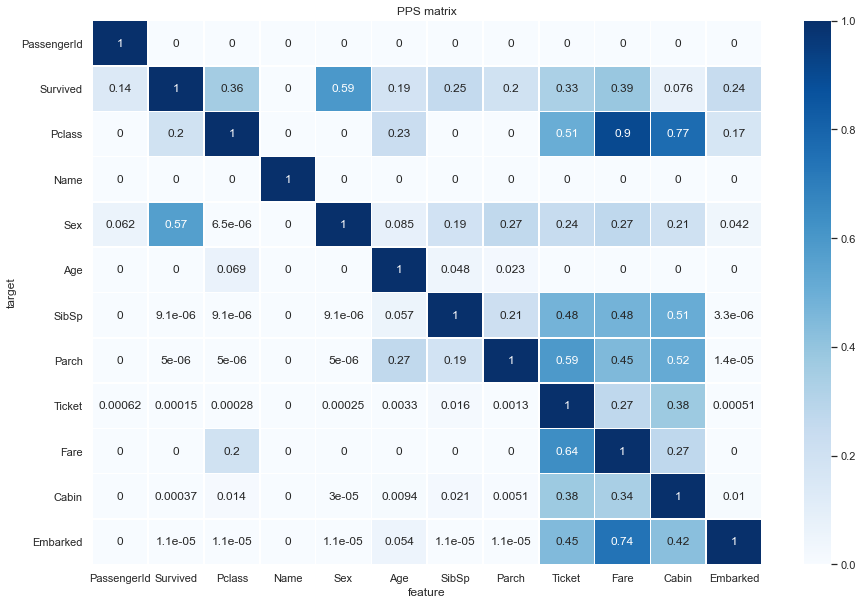

In [22]:
matrix = pps.matrix(data_raw)
heatmap(matrix);

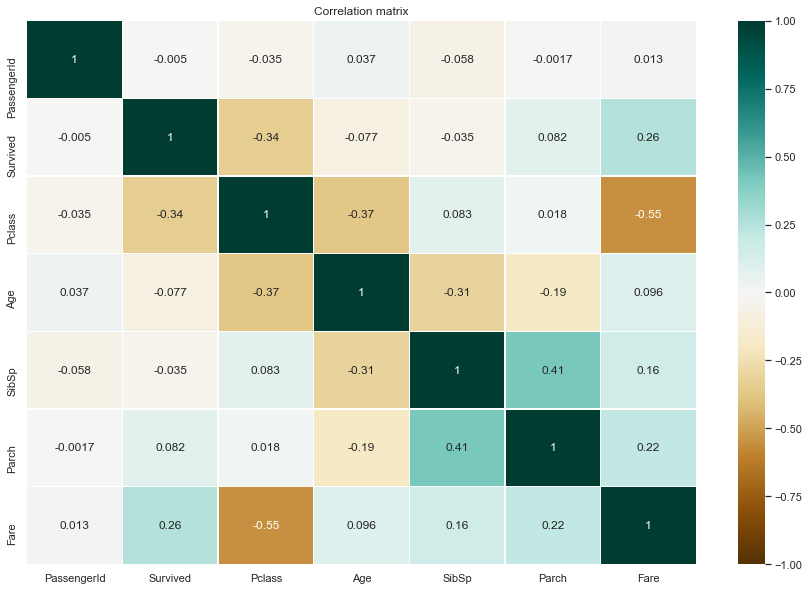

In [21]:
plt.figure(figsize = (15,10))
corr_heatmap(data_raw.corr());

**Clean Data**

Now that we know what to clean, let's execute our code.

In [28]:
def data_clean(dataset):
    
    
    imp = SimpleImputer(strategy = 'median')
    
    dataset['Age'] = imp.fit_transform(dataset[['Age']])
    dataset['Fare'] = imp.fit_transform(dataset[['Fare']])
    
    imp2 = SimpleImputer(strategy = 'most_frequent')
    
    dataset['Embarked'] = imp2.fit_transform(dataset[['Embarked']])
    
    return dataset


data1 = data_clean(data1)
data_val = data_clean(data_val)

drop_column = ['PassengerId','Cabin', 'Ticket']
data1.drop(drop_column, axis=1, inplace = True)

print(data1.isnull().sum())
print("-"*10)
print(data_val.isnull().sum())

Survived     0
Pclass       0
Name         0
Sex          0
Age          0
SibSp        0
Parch        0
Fare         0
Embarked     0
Embarqued    0
dtype: int64
----------
PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
Embarqued        0
dtype: int64


In [23]:
###CREATE: Feature Engineering for train and test/validation dataset
for dataset in data_cleaner:    
    #Discrete variables
    dataset['FamilySize'] = dataset ['SibSp'] + dataset['Parch'] + 1

    dataset['IsAlone'] = 1 #initialize to yes/1 is alone
    dataset['IsAlone'].loc[dataset['FamilySize'] > 1] = 0 # now update to no/0 if family size is greater than 1

    #split title from name
    dataset['Title'] = dataset['Name'].str.split(", ", expand=True)[1].str.split(".", expand=True)[0]


    #Continuous variable bins; qcut vs cut: https://stackoverflow.com/questions/30211923/what-is-the-difference-between-pandas-qcut-and-pandas-cut
    #Fare Bins/Buckets using qcut or frequency bins: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.qcut.html
    dataset['FareBin'] = pd.qcut(dataset['Fare'], 4)

    #Age Bins/Buckets using cut or value bins: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.cut.html
    dataset['AgeBin'] = pd.cut(dataset['Age'].astype(int), 5)


    
#cleanup rare title names
#print(data1['Title'].value_counts())
stat_min = 10 #while small is arbitrary, we'll use the common minimum in statistics: http://nicholasjjackson.com/2012/03/08/sample-size-is-10-a-magic-number/
title_names = (data1['Title'].value_counts() < stat_min) #this will create a true false series with title name as index

#apply and lambda functions are quick and dirty code to find and replace with fewer lines of code: https://community.modeanalytics.com/python/tutorial/pandas-groupby-and-python-lambda-functions/
data1['Title'] = data1['Title'].apply(lambda x: 'Misc' if title_names.loc[x] == True else x)
print(data1['Title'].value_counts())
print("-"*10)


#preview data again
data1.info()
data_val.info()
data1.head(10)

Mr        517
Miss      182
Mrs       125
Master     40
Misc       27
Name: Title, dtype: int64
----------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
Survived      891 non-null int64
Pclass        891 non-null int64
Name          891 non-null object
Sex           891 non-null object
Age           891 non-null float64
SibSp         891 non-null int64
Parch         891 non-null int64
Fare          891 non-null float64
Embarked      891 non-null object
FamilySize    891 non-null int64
IsAlone       891 non-null int64
Title         891 non-null object
FareBin       891 non-null category
AgeBin        891 non-null category
dtypes: category(2), float64(2), int64(6), object(4)
memory usage: 85.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 16 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null 

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,IsAlone,Title,FareBin,AgeBin
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,2,0,Mr,"(-0.001, 7.91]","(16.0, 32.0]"
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,2,0,Mrs,"(31.0, 512.329]","(32.0, 48.0]"
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,1,1,Miss,"(7.91, 14.454]","(16.0, 32.0]"
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,2,0,Mrs,"(31.0, 512.329]","(32.0, 48.0]"
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1,1,Mr,"(7.91, 14.454]","(32.0, 48.0]"
5,0,3,"Moran, Mr. James",male,28.0,0,0,8.4583,Q,1,1,Mr,"(7.91, 14.454]","(16.0, 32.0]"
6,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,51.8625,S,1,1,Mr,"(31.0, 512.329]","(48.0, 64.0]"
7,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,21.0750,S,5,0,Master,"(14.454, 31.0]","(-0.08, 16.0]"
8,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,11.1333,S,3,0,Mrs,"(7.91, 14.454]","(16.0, 32.0]"
9,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,30.0708,C,2,0,Mrs,"(14.454, 31.0]","(-0.08, 16.0]"


**Convert Formats**

We will convert categorical data to dummy variables for mathematical analysis. There are multiple ways to encode categorical variables; we will use the sklearn and pandas functions.



** Developer Documentation: **
* [Categorical Encoding](http://pbpython.com/categorical-encoding.html)
* [Sklearn LabelEncoder](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html)
* [Sklearn OneHotEncoder](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html)
* [Pandas Categorical dtype](https://pandas.pydata.org/pandas-docs/stable/categorical.html)
* [pandas.get_dummies](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html)

In [43]:
# Convert objects to category using Label Encoder for train and test/validation dataset

#code categorical data
label = LabelEncoder()
for dataset in data_cleaner:    
    dataset['Sex_Code'] = label.fit_transform(dataset['Sex'])
    dataset['Embarked_Code'] = label.fit_transform(dataset['Embarked'])
    dataset['Title_Code'] = label.fit_transform(dataset['Title'])
    dataset['AgeBin_Code'] = label.fit_transform(dataset['AgeBin'])
    dataset['FareBin_Code'] = label.fit_transform(dataset['FareBin'])


#define y variable aka target/outcome
Target = ['Survived']

#define x variables for original features aka feature selection
data1_x = ['Sex','Pclass', 'Embarked', 'Title','SibSp', 'Parch', 'Age', 'Fare', 'FamilySize', 'IsAlone'] #pretty name/values for charts
data1_x_calc = ['Sex_Code','Pclass', 'Embarked_Code', 'Title_Code','SibSp', 'Parch', 'Age', 'Fare'] #coded for algorithm calculation
data1_xy =  Target + data1_x
print('Original X Y: ', data1_xy, '\n')


#define x variables for original w/bin features to remove continuous variables
data1_x_bin = ['Sex_Code','Pclass', 'Embarked_Code', 'Title_Code', 'FamilySize', 'AgeBin_Code', 'FareBin_Code']
data1_xy_bin = Target + data1_x_bin
print('Bin X Y: ', data1_xy_bin, '\n')


#define x and y variables for dummy features original
data1_dummy = pd.get_dummies(data1[data1_x])
data1_x_dummy = data1_dummy.columns.tolist()
data1_xy_dummy = Target + data1_x_dummy
print('Dummy X Y: ', data1_xy_dummy, '\n')


data1_dummy.head()

Original X Y:  ['Survived', 'Sex', 'Pclass', 'Embarked', 'Title', 'SibSp', 'Parch', 'Age', 'Fare', 'FamilySize', 'IsAlone'] 

Bin X Y:  ['Survived', 'Sex_Code', 'Pclass', 'Embarked_Code', 'Title_Code', 'FamilySize', 'AgeBin_Code', 'FareBin_Code'] 

Dummy X Y:  ['Survived', 'Pclass', 'SibSp', 'Parch', 'Age', 'Fare', 'FamilySize', 'IsAlone', 'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Title_Master', 'Title_Misc', 'Title_Miss', 'Title_Mr', 'Title_Mrs'] 



,Pclass,SibSp,Parch,Age,Fare,FamilySize,IsAlone,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Misc,Title_Miss,Title_Mr,Title_Mrs
0,3,1,0,22.0,7.2500,2,0,0,1,0,0,1,0,0,0,1,0
1,1,1,0,38.0,71.2833,2,0,1,0,1,0,0,0,0,0,0,1
2,3,0,0,26.0,7.9250,1,1,1,0,0,0,1,0,0,1,0,0
3,1,1,0,35.0,53.1000,2,0,1,0,0,0,1,0,0,0,0,1
4,3,0,0,35.0,8.0500,1,1,0,1,0,0,1,0,0,0,1,0


**Split Training and Testing Data**

As mentioned previously, the test file provided is really validation data for competition submission. So, we will use *sklearn* function to split the training data in two datasets; 75/25 split. This is important, so we don't [overfit our model](https://www.coursera.org/learn/python-machine-learning/lecture/fVStr/overfitting-and-underfitting). Meaning, the algorithm is so specific to a given subset, it cannot accurately generalize another subset, from the same dataset. It's important our algorithm has not seen the subset we will use to test, so it doesn't "cheat" by memorizing the answers. We will use [*sklearn's* train_test_split function](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html). In later sections we will also use [*sklearn's* cross validation functions](http://scikit-learn.org/stable/modules/cross_validation.html#cross-validation), that splits our dataset into train and test for data modeling comparison.

In [65]:
#split train and test data with function defaults
#random_state -> seed or control random number generator: https://www.quora.com/What-is-seed-in-random-number-generation
train1_x, test1_x, train1_y, test1_y = model_selection.train_test_split(data1[data1_x_calc], data1[Target], random_state = 0)
train1_x_bin, test1_x_bin, train1_y_bin, test1_y_bin = model_selection.train_test_split(data1[data1_x_bin], data1[Target] , random_state = 0)
train1_x_dummy, test1_x_dummy, train1_y_dummy, test1_y_dummy = model_selection.train_test_split(data1_dummy[data1_x_dummy], data1[Target], random_state = 0)


print("Data1 Shape: {}".format(data1.shape))
print("Train1 Shape: {}".format(train1_x.shape))
print("Test1 Shape: {}".format(test1_x.shape))

train1_x.head()

Data1 Shape: (891, 19)
Train1 Shape: (668, 8)
Test1 Shape: (223, 8)


,Sex_Code,Pclass,Embarked_Code,Title_Code,SibSp,Parch,Age,Fare
105,1,3,2,3,0,0,28.0,7.8958
68,0,3,2,2,4,2,17.0,7.9250
253,1,3,2,3,1,0,30.0,16.1000
320,1,3,2,3,0,0,22.0,7.2500
706,0,2,2,4,0,0,45.0,13.5000


In [66]:
train1_x_bin.head()

,Sex_Code,Pclass,Embarked_Code,Title_Code,FamilySize,AgeBin_Code,FareBin_Code
105,1,3,2,3,1,1,0
68,0,3,2,2,7,1,1
253,1,3,2,3,2,1,2
320,1,3,2,3,1,1,0
706,0,2,2,4,1,2,1


In [67]:
train1_x_dummy.head()

,Pclass,SibSp,Parch,Age,Fare,FamilySize,IsAlone,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Misc,Title_Miss,Title_Mr,Title_Mrs
105,3,0,0,28.0,7.8958,1,1,0,1,0,0,1,0,0,0,1,0
68,3,4,2,17.0,7.9250,7,0,1,0,0,0,1,0,0,1,0,0
253,3,1,0,30.0,16.1000,2,0,0,1,0,0,1,0,0,0,1,0
320,3,0,0,22.0,7.2500,1,1,0,1,0,0,1,0,0,0,1,0
706,2,0,0,45.0,13.5000,1,1,1,0,0,0,1,0,0,0,0,1


<a id="4"></a> <br>
## Step 4: Exploratory Analysis
Now that our data is cleaned, we will explore our data with descriptive and graphical statistics to describe and summarize our variables. In this stage, you will find yourself classifying features and determining their correlation with the target variable and each other.

Survival Correlation by: Sex


      Sex  Survived
0  female  0.742038
1    male  0.188908


---------- 

Survival barplot by : Sex


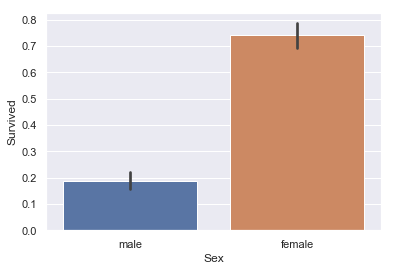

---------- 

Survival Correlation by: Pclass


   Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363


---------- 

Survival barplot by : Pclass


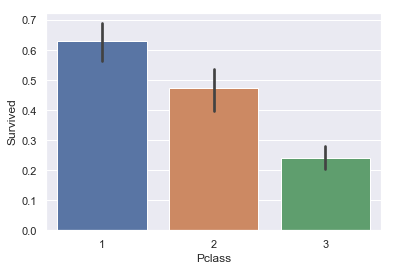

---------- 

Survival Correlation by: Embarked


  Embarked  Survived
0        C  0.553571
1        Q  0.389610
2        S  0.339009


---------- 

Survival barplot by : Embarked


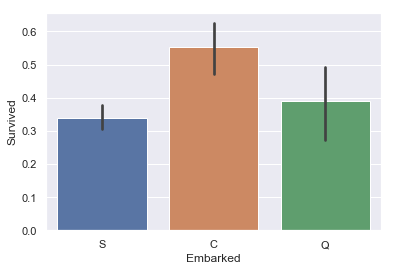

---------- 

Survival Correlation by: Title


    Title  Survived
0  Master  0.575000
1    Misc  0.444444
2    Miss  0.697802
3      Mr  0.156673
4     Mrs  0.792000


---------- 

Survival barplot by : Title


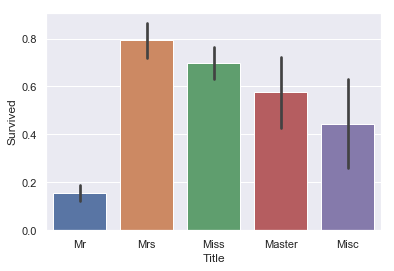

---------- 

Survival Correlation by: SibSp


   SibSp  Survived
0      0  0.345395
1      1  0.535885
2      2  0.464286
3      3  0.250000
4      4  0.166667
5      5  0.000000
6      8  0.000000


---------- 

Survival barplot by : SibSp


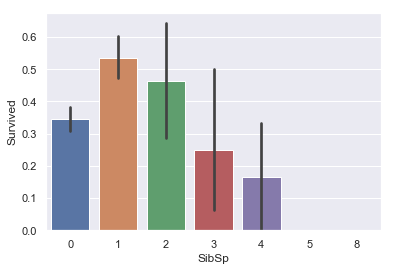

---------- 

Survival Correlation by: Parch


   Parch  Survived
0      0  0.343658
1      1  0.550847
2      2  0.500000
3      3  0.600000
4      4  0.000000
5      5  0.200000
6      6  0.000000


---------- 

Survival barplot by : Parch


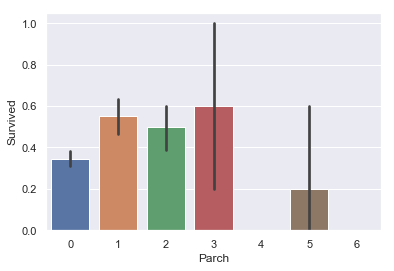

---------- 

Survival Correlation by: FamilySize


   FamilySize  Survived
0           1  0.303538
1           2  0.552795
2           3  0.578431
3           4  0.724138
4           5  0.200000
5           6  0.136364
6           7  0.333333
7           8  0.000000
8          11  0.000000


---------- 

Survival barplot by : FamilySize


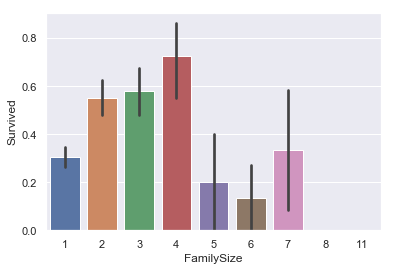

---------- 

Survival Correlation by: IsAlone


   IsAlone  Survived
0        0  0.505650
1        1  0.303538


---------- 

Survival barplot by : IsAlone


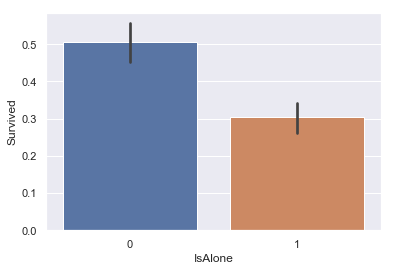

---------- 



In [99]:
#Discrete Variable Correlation by Survival using
#group by aka pivot table: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.groupby.html
for x in data1_x:
    if data1[x].dtype != 'float64' :
        print('Survival Correlation by:', x)
        print('\n')
        print(data1[[x, Target[0]]].groupby(x, as_index=False).mean())
        print('\n')
        print('-'*10, '\n')
        print('Survival barplot by :', x)
        sns.barplot(x = x, y = Target[0], data=data1)
        plt.show();
        print('-'*10, '\n')

In [100]:
#using crosstabs: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.crosstab.html
print(pd.crosstab(data1['Title'],data1[Target[0]]))

Survived    0    1
Title             
Master     17   23
Misc       15   12
Miss       55  127
Mr        436   81
Mrs        26   99


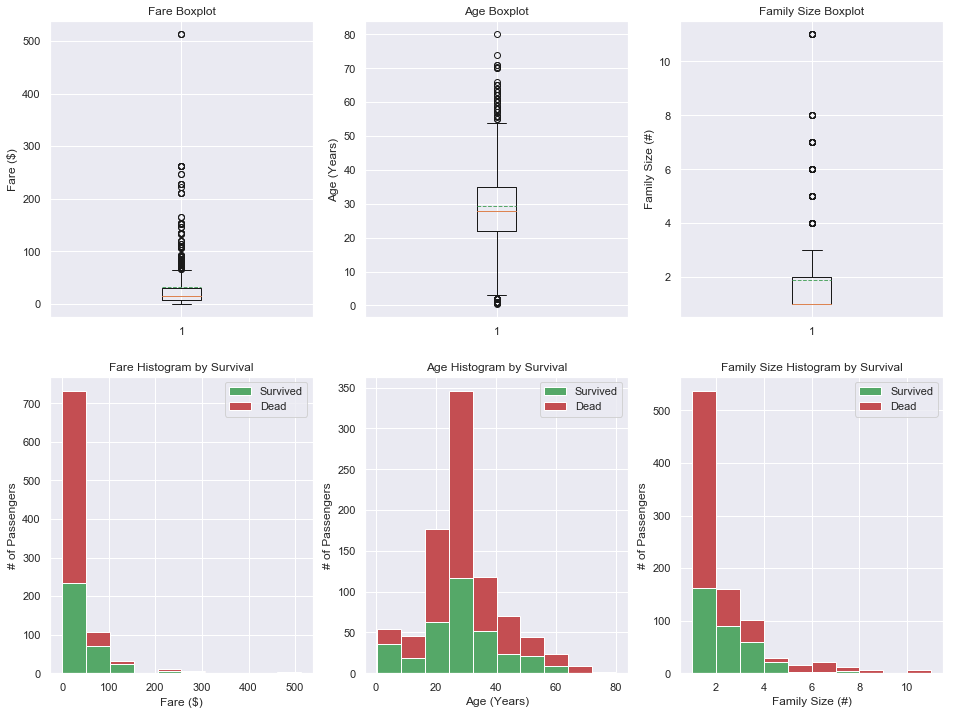

In [17]:
#graph distribution of quantitative data
plt.figure(figsize=[16,12])

plt.subplot(231)
plt.boxplot(x=data1['Fare'], showmeans = True, meanline = True)
plt.title('Fare Boxplot')
plt.ylabel('Fare ($)')

plt.subplot(232)
plt.boxplot(data1['Age'], showmeans = True, meanline = True)
plt.title('Age Boxplot')
plt.ylabel('Age (Years)')

plt.subplot(233)
plt.boxplot(data1['FamilySize'], showmeans = True, meanline = True)
plt.title('Family Size Boxplot')
plt.ylabel('Family Size (#)')

plt.subplot(234)
plt.hist(x = [data1[data1['Survived']==1]['Fare'], data1[data1['Survived']==0]['Fare']], 
         stacked=True, color = ['g','r'],label = ['Survived','Dead'])
plt.title('Fare Histogram by Survival')
plt.xlabel('Fare ($)')
plt.ylabel('# of Passengers')
plt.legend()

plt.subplot(235)
plt.hist(x = [data1[data1['Survived']==1]['Age'], data1[data1['Survived']==0]['Age']], 
         stacked=True, color = ['g','r'],label = ['Survived','Dead'])
plt.title('Age Histogram by Survival')
plt.xlabel('Age (Years)')
plt.ylabel('# of Passengers')
plt.legend()

plt.subplot(236)
plt.hist(x = [data1[data1['Survived']==1]['FamilySize'], data1[data1['Survived']==0]['FamilySize']], 
         stacked=True, color = ['g','r'],label = ['Survived','Dead'])
plt.title('Family Size Histogram by Survival')
plt.xlabel('Family Size (#)')
plt.ylabel('# of Passengers')
plt.legend()


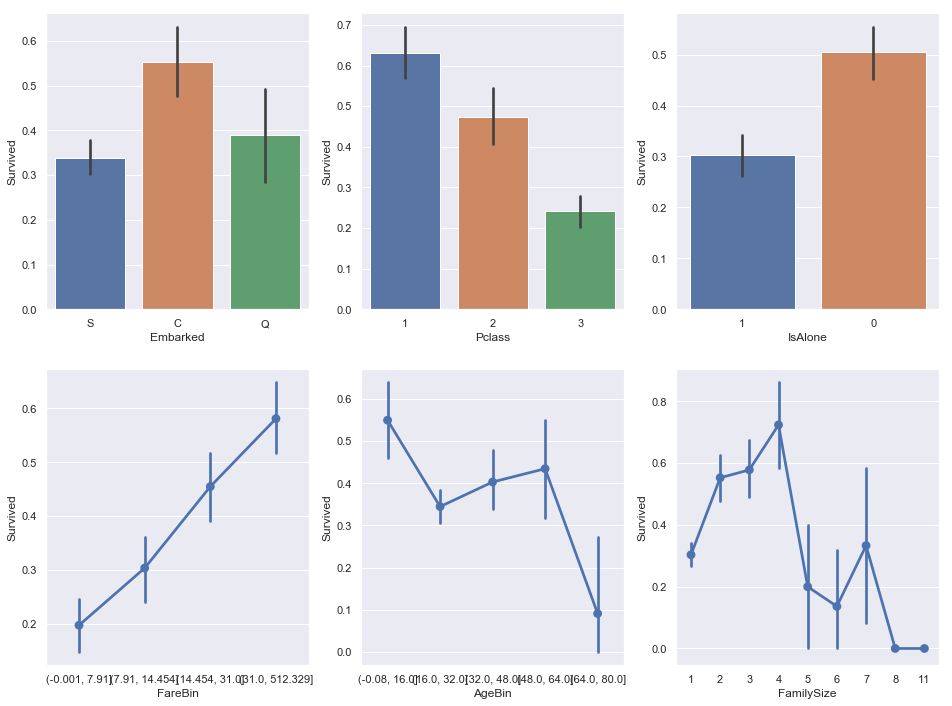

In [18]:
#graph individual features by survival
fig, saxis = plt.subplots(2, 3,figsize=(16,12))

sns.barplot(x = 'Embarked', y = 'Survived', data=data1, ax = saxis[0,0])
sns.barplot(x = 'Pclass', y = 'Survived', order=[1,2,3], data=data1, ax = saxis[0,1])
sns.barplot(x = 'IsAlone', y = 'Survived', order=[1,0], data=data1, ax = saxis[0,2])

sns.pointplot(x = 'FareBin', y = 'Survived',  data=data1, ax = saxis[1,0])
sns.pointplot(x = 'AgeBin', y = 'Survived',  data=data1, ax = saxis[1,1])
sns.pointplot(x = 'FamilySize', y = 'Survived', data=data1, ax = saxis[1,2])

Text(0.5,1,'Pclass vs Family Size Survival Comparison')

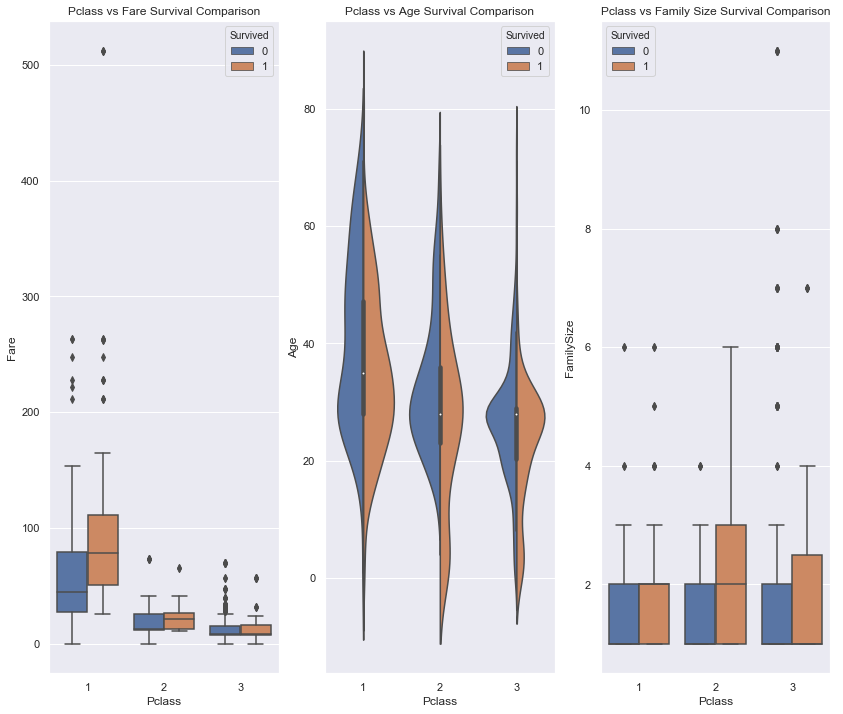

In [19]:
#graph distribution of qualitative data: Pclass
#we know class mattered in survival, now let's compare class and a 2nd feature
fig, (axis1,axis2,axis3) = plt.subplots(1,3,figsize=(14,12))

sns.boxplot(x = 'Pclass', y = 'Fare', hue = 'Survived', data = data1, ax = axis1)
axis1.set_title('Pclass vs Fare Survival Comparison')

sns.violinplot(x = 'Pclass', y = 'Age', hue = 'Survived', data = data1, split = True, ax = axis2)
axis2.set_title('Pclass vs Age Survival Comparison')

sns.boxplot(x = 'Pclass', y ='FamilySize', hue = 'Survived', data = data1, ax = axis3)
axis3.set_title('Pclass vs Family Size Survival Comparison')

Text(0.5,1,'Sex vs IsAlone Survival Comparison')

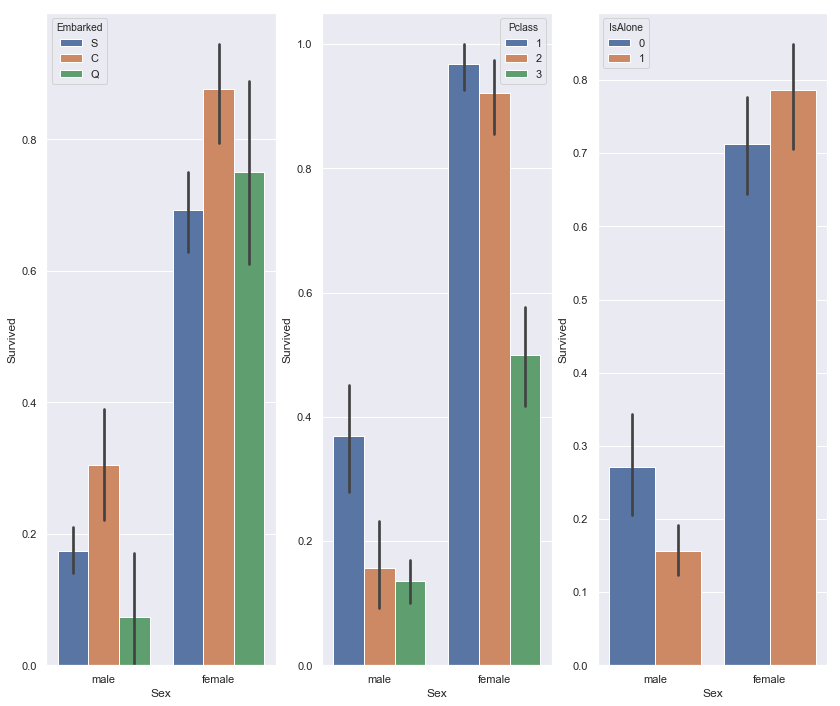

In [22]:
#we know sex mattered in survival, now let's compare sex and a 2nd feature
fig, qaxis = plt.subplots(1,3,figsize=(14,12))

sns.barplot(x = 'Sex', y = 'Survived', hue = 'Embarked', data=data1, ax = qaxis[0])
axis1.set_title('Sex vs Embarked Survival Comparison')

sns.barplot(x = 'Sex', y = 'Survived', hue = 'Pclass', data=data1, ax  = qaxis[1])
axis1.set_title('Sex vs Pclass Survival Comparison')

sns.barplot(x = 'Sex', y = 'Survived', hue = 'IsAlone', data=data1, ax  = qaxis[2])
axis1.set_title('Sex vs IsAlone Survival Comparison')

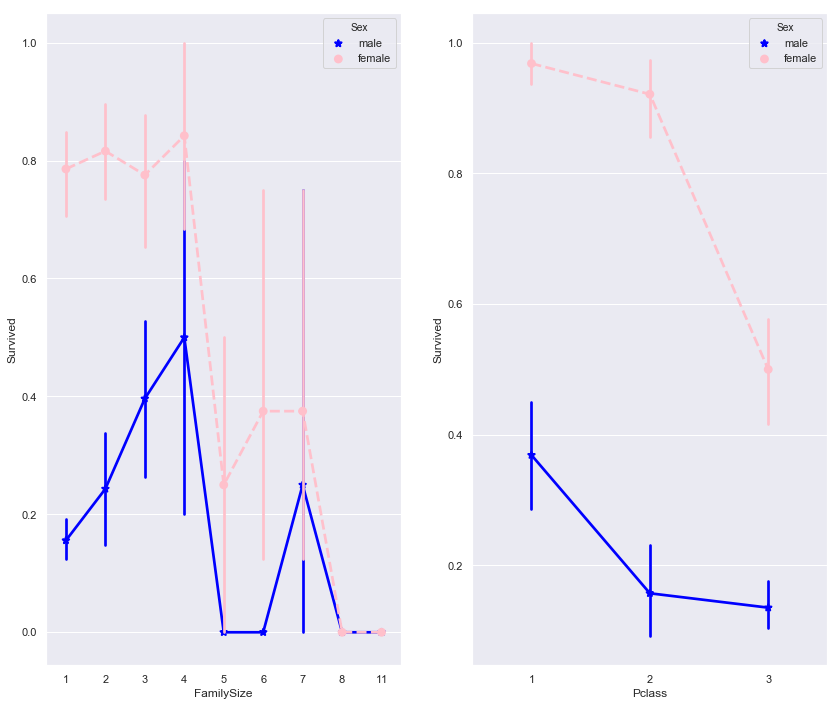

In [23]:
#more side-by-side comparisons
fig, (maxis1, maxis2) = plt.subplots(1, 2,figsize=(14,12))

#how does family size factor with sex & survival compare
sns.pointplot(x="FamilySize", y="Survived", hue="Sex", data=data1,
              palette={"male": "blue", "female": "pink"},
              markers=["*", "o"], linestyles=["-", "--"], ax = maxis1)

#how does class factor with sex & survival compare
sns.pointplot(x="Pclass", y="Survived", hue="Sex", data=data1,
              palette={"male": "blue", "female": "pink"},
              markers=["*", "o"], linestyles=["-", "--"], ax = maxis2)

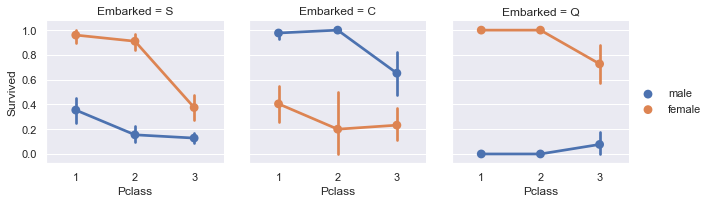

In [101]:
#how does embark port factor with class, sex, and survival compare
#facetgrid: https://seaborn.pydata.org/generated/seaborn.FacetGrid.html
e = sns.FacetGrid(data1, col = 'Embarked')
e.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', ci=95.0, palette = 'deep')
e.add_legend();

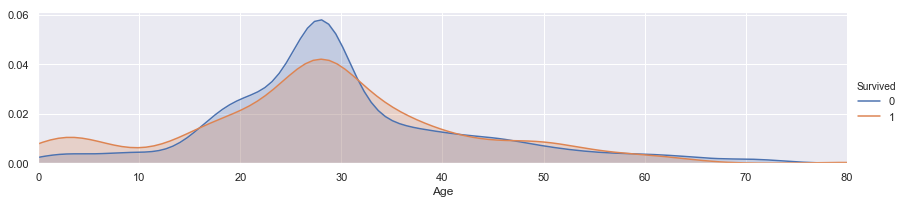

In [102]:
#plot distributions of age of passengers who survived or did not survive
a = sns.FacetGrid( data1, hue = 'Survived', aspect=4 )
a.map(sns.kdeplot, 'Age', shade= True )
a.set(xlim=(0 , data1['Age'].max()))
a.add_legend();

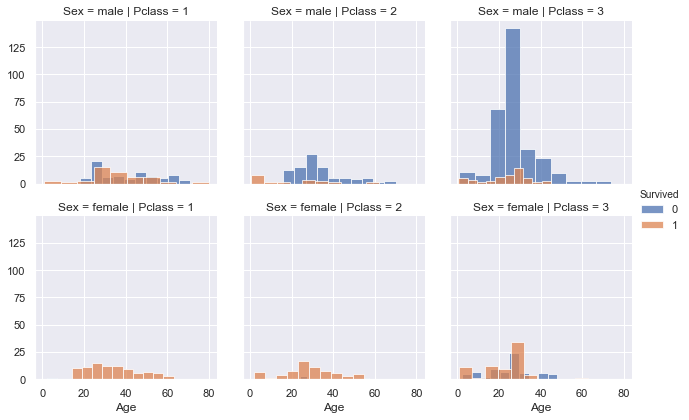

In [103]:
#histogram comparison of sex, class, and age by survival
h = sns.FacetGrid(data1, row = 'Sex', col = 'Pclass', hue = 'Survived')
h.map(plt.hist, 'Age', alpha = .75)
h.add_legend();

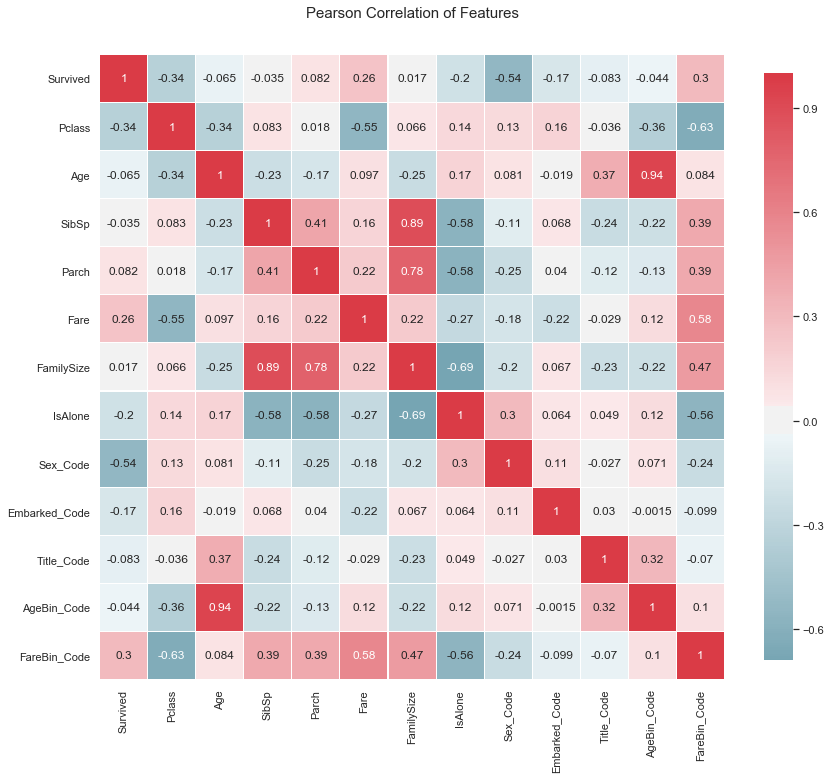

In [105]:
#correlation heatmap of dataset
def correlation_heatmap(df):
    _ , ax = plt.subplots(figsize =(14, 12))
    colormap = sns.diverging_palette(220, 10, as_cmap = True)
    
    _ = sns.heatmap(
        df.corr(), 
        cmap = colormap,
        center = 0,
        square=True, 
        cbar_kws={'shrink':.9 }, 
        ax=ax,
        annot=True,
        linewidths=0.1,vmax=1.0, linecolor='white',
        annot_kws={'fontsize':12 }
    )
    
    plt.title('Pearson Correlation of Features', y=1.05, size=15)

correlation_heatmap(data1)

<a id="5"></a> <br>
## Step 5: Machine Learning

The purpose of machine learning is to solve human problems. Machine learning can be categorized as: supervised learning, unsupervised learning, and reinforced learning. Supervised learning is where you train the model by presenting it a training dataset that includes the correct answer. Unsupervised learning is where you train the model using a training dataset that does not include the correct answer. And reinforced learning is a hybrid of the previous two, where the model is not given the correct answer immediately, but later after a sequence of events to reinforce learning. We are doing supervised machine learning, because we are training our algorithm by presenting it with a set of features and their corresponding target. We then hope to present it a new subset from the same dataset and have similar results in prediction accuracy.

There are many machine learning algorithms, however they can be reduced to four categories: classification, regression, clustering, or dimensionality reduction, depending on your target variable and data modeling goals. We'll save clustering and dimension reduction for another day, and focus on classification and regression.

#### Metrics used : Accuracy

In [43]:
#Machine Learning Algorithm (MLA) Selection and Initialization
MLA = [
    #Ensemble Methods
    ensemble.AdaBoostClassifier(),
    ensemble.BaggingClassifier(),
    ensemble.ExtraTreesClassifier(),
    ensemble.GradientBoostingClassifier(),
    ensemble.RandomForestClassifier(),

    #Gaussian Processes
    gaussian_process.GaussianProcessClassifier(),
    
    #GLM
    linear_model.LogisticRegressionCV(),
    linear_model.PassiveAggressiveClassifier(),
    linear_model.RidgeClassifierCV(),
    linear_model.SGDClassifier(),
    linear_model.Perceptron(),
    
    #Navies Bayes
    naive_bayes.BernoulliNB(),
    naive_bayes.GaussianNB(),
    naive_bayes.MultinomialNB(),

    
    #Nearest Neighbor
    neighbors.KNeighborsClassifier(),
    
    #SVM
    svm.SVC(probability=True),
    svm.NuSVC(probability=True),
    svm.LinearSVC(),
    
    #Trees    
    tree.DecisionTreeClassifier(),
    tree.ExtraTreeClassifier(),
    
    #Discriminant Analysis
    discriminant_analysis.LinearDiscriminantAnalysis(),
    discriminant_analysis.QuadraticDiscriminantAnalysis(),

    
    #xgboost
    XGBClassifier(),
    LGBMClassifier()
    ]


cv_split = model_selection.ShuffleSplit(n_splits = 10, test_size = .3, train_size = .6, random_state = 0 )

#create table to compare MLA metrics
MLA_columns = ['MLA Name', 'MLA Parameters','MLA Train Accuracy Mean', 'MLA Test Accuracy Mean', 'MLA Test Accuracy 3*STD' ,'MLA Time']
MLA_compare = pd.DataFrame(columns = MLA_columns)

#create table to compare MLA predictions
MLA_predict = data1[Target]

#index through MLA and save performance to table
row_index = 0
for alg in MLA:

    #set name and parameters
    MLA_name = alg.__class__.__name__
    MLA_compare.loc[row_index, 'MLA Name'] = MLA_name
    MLA_compare.loc[row_index, 'MLA Parameters'] = str(alg.get_params())
    
    cv_results = model_selection.cross_validate(alg, data1[data1_x_bin], data1[Target], cv  = cv_split)

    MLA_compare.loc[row_index, 'MLA Time'] = cv_results['fit_time'].mean()
    MLA_compare.loc[row_index, 'MLA Train Accuracy Mean'] = cv_results['train_score'].mean()
    MLA_compare.loc[row_index, 'MLA Test Accuracy Mean'] = cv_results['test_score'].mean()   
    MLA_compare.loc[row_index, 'MLA Test Accuracy 3*STD'] = cv_results['test_score'].std()*3   

    #save MLA predictions - see section 6 for usage
    alg.fit(data1[data1_x_bin], data1[Target])
    MLA_predict[MLA_name] = alg.predict(data1[data1_x_bin])
    
    row_index+=1

    
MLA_compare.sort_values(by = ['MLA Test Accuracy Mean'], ascending = False, inplace = True)
MLA_compare
#MLA_predict



,MLA Name,MLA Parameters,MLA Train Accuracy Mean,MLA Test Accuracy Mean,MLA Test Accuracy 3*STD,MLA Time
23,LGBMClassifier,"{'boosting_type': 'gbdt', 'class_weight': None...",0.871536,0.829478,0.0623358,0.0254317
22,XGBClassifier,"{'base_score': 0.5, 'booster': 'gbtree', 'cols...",0.856367,0.829478,0.0527546,0.0675238
15,SVC,"{'C': 1.0, 'cache_size': 200, 'class_weight': ...",0.837266,0.826119,0.0453876,0.0309178
16,NuSVC,"{'cache_size': 200, 'class_weight': None, 'coe...",0.835768,0.822761,0.0493681,0.0375513
1,BaggingClassifier,"{'base_estimator': None, 'bootstrap': True, 'b...",0.891011,0.822388,0.0695833,0.0193829
4,RandomForestClassifier,"{'bootstrap': True, 'class_weight': None, 'cri...",0.892322,0.822388,0.0699425,0.0172512
3,GradientBoostingClassifier,"{'criterion': 'friedman_mse', 'init': None, 'l...",0.866667,0.822015,0.0529916,0.0697094
2,ExtraTreesClassifier,"{'bootstrap': False, 'class_weight': None, 'cr...",0.895131,0.820522,0.063412,0.0159583
18,DecisionTreeClassifier,"{'class_weight': None, 'criterion': 'gini', 'm...",0.895131,0.81791,0.056149,0.00319152
19,ExtraTreeClassifier,"{'class_weight': None, 'criterion': 'gini', 'm...",0.895131,0.815672,0.058209,0.00278087


Text(0,0.5,'Algorithm')

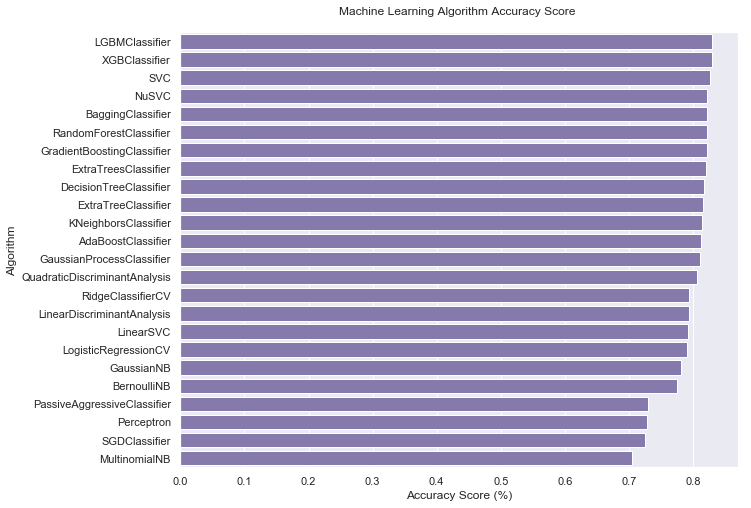

In [45]:
fig, ax = plt.subplots(figsize=(10,8))


sns.barplot(x='MLA Test Accuracy Mean', y = 'MLA Name', data = MLA_compare, color = 'm')

plt.title('Machine Learning Algorithm Accuracy Score \n')
plt.xlabel('Accuracy Score (%)')
plt.ylabel('Algorithm')

It seems that all of our models does well

#### Metrics used : AUC

In [42]:
#create table to compare MLA metrics
MLA_columns = ['MLA Name', 'MLA Parameters','MLA Train roc auc Mean', 'MLA Test roc auc Mean', 'MLA Test roc auc 3*STD' ,'MLA Time']
MLA_compare1 = pd.DataFrame(columns = MLA_columns)

#create table to compare MLA predictions
MLA_predict = data1[Target]


#index through MLA and save performance to table
row_index = 0
for alg in MLA:

    #set name and parameters
    MLA_name = alg.__class__.__name__
    MLA_compare1.loc[row_index, 'MLA Name'] = MLA_name
    MLA_compare1.loc[row_index, 'MLA Parameters'] = str(alg.get_params())
    
    #score model with cross validation: http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html#sklearn.model_selection.cross_validate
    cv_results = model_selection.cross_validate(alg, data1[data1_x_bin], data1[Target], cv  = cv_split, scoring = "roc_auc")

    MLA_compare1.loc[row_index, 'MLA Time'] = cv_results['fit_time'].mean()
    MLA_compare1.loc[row_index, 'MLA Train roc auc Mean'] = cv_results['train_score'].mean()
    MLA_compare1.loc[row_index, 'MLA Test roc auc Mean'] = cv_results['test_score'].mean()   
    #if this is a non-bias random sample, then +/-3 standard deviations (std) from the mean, should statistically capture 99.7% of the subsets
    MLA_compare1.loc[row_index, 'MLA Test roc auc 3*STD'] = cv_results['test_score'].std()*3   #let's know the worst that can happen!
    

    #save MLA predictions - see section 6 for usage
    alg.fit(data1[data1_x_bin], data1[Target])
    MLA_predict[MLA_name] = alg.predict(data1[data1_x_bin])
    
    row_index+=1

    
#print and sort table: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sort_values.html
MLA_compare1.sort_values(by = ['MLA Test roc auc Mean'], ascending = False, inplace = True)
MLA_compare1
#MLA_predict

,MLA Name,MLA Parameters,MLA Train roc auc Mean,MLA Test roc auc Mean,MLA Test roc auc 3*STD,MLA Time
3,GradientBoostingClassifier,"{'criterion': 'friedman_mse', 'init': None, 'l...",0.92691,0.882027,0.0677813,0.0583375
22,XGBClassifier,"{'base_score': 0.5, 'booster': 'gbtree', 'cols...",0.91338,0.881757,0.0712142,0.114455
0,AdaBoostClassifier,"{'algorithm': 'SAMME.R', 'base_estimator': Non...",0.88896,0.875442,0.0484895,0.0621331
23,LGBMClassifier,"{'boosting_type': 'gbdt', 'class_weight': None...",0.93293,0.874567,0.0750451,0.0230343
21,QuadraticDiscriminantAnalysis,"{'priors': None, 'reg_param': 0.0, 'store_cova...",0.876462,0.863067,0.0557999,0.00229387
17,LinearSVC,"{'C': 1.0, 'class_weight': None, 'dual': True,...",0.866838,0.862144,0.0503238,0.0261324
12,GaussianNB,"{'priors': None, 'var_smoothing': 1e-09}",0.866791,0.86138,0.0717471,0.00229573
6,LogisticRegressionCV,"{'Cs': 10, 'class_weight': None, 'cv': 'warn',...",0.867307,0.860411,0.0556791,0.0827781
8,RidgeClassifierCV,"{'alphas': array([ 0.1, 1. , 10. ]), 'class_w...",0.866725,0.860081,0.0497967,0.00558066
20,LinearDiscriminantAnalysis,"{'n_components': None, 'priors': None, 'shrink...",0.866718,0.860046,0.0493061,0.00319133


Text(0,0.5,'Algorithm')

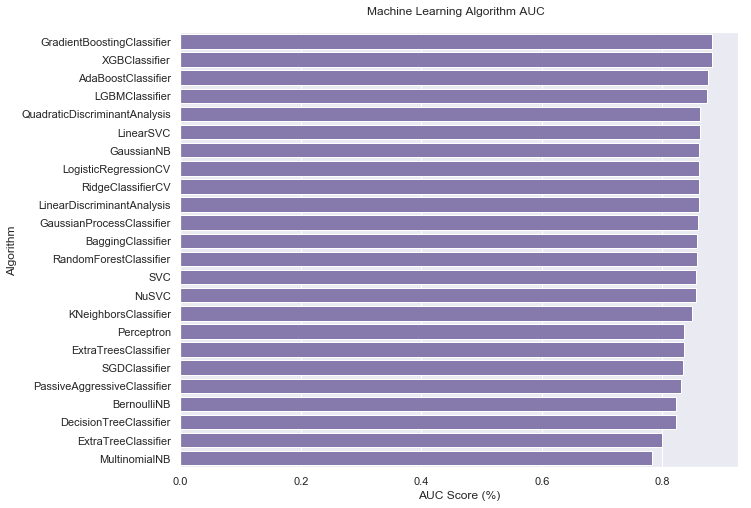

In [47]:
#barplot using https://seaborn.pydata.org/generated/seaborn.barplot.html
fig, ax = plt.subplots(figsize=(10,8))


sns.barplot(x='MLA Test roc auc Mean', y = 'MLA Name', data = MLA_compare1, color = 'm')

#prettify using pyplot: https://matplotlib.org/api/pyplot_api.html
plt.title('Machine Learning Algorithm AUC  \n')
plt.xlabel('AUC Score (%)')
plt.ylabel('Algorithm')

As we can see, all of our models seems quite good, but 4 stand out :
- GradientBoostingClassifier
- XGBClassifier
- AdaBoostClassifier
- LGBMClassifier

That's doesn't surprise me !

<a id="6"></a>
## Step 6: Ensembling and tuning

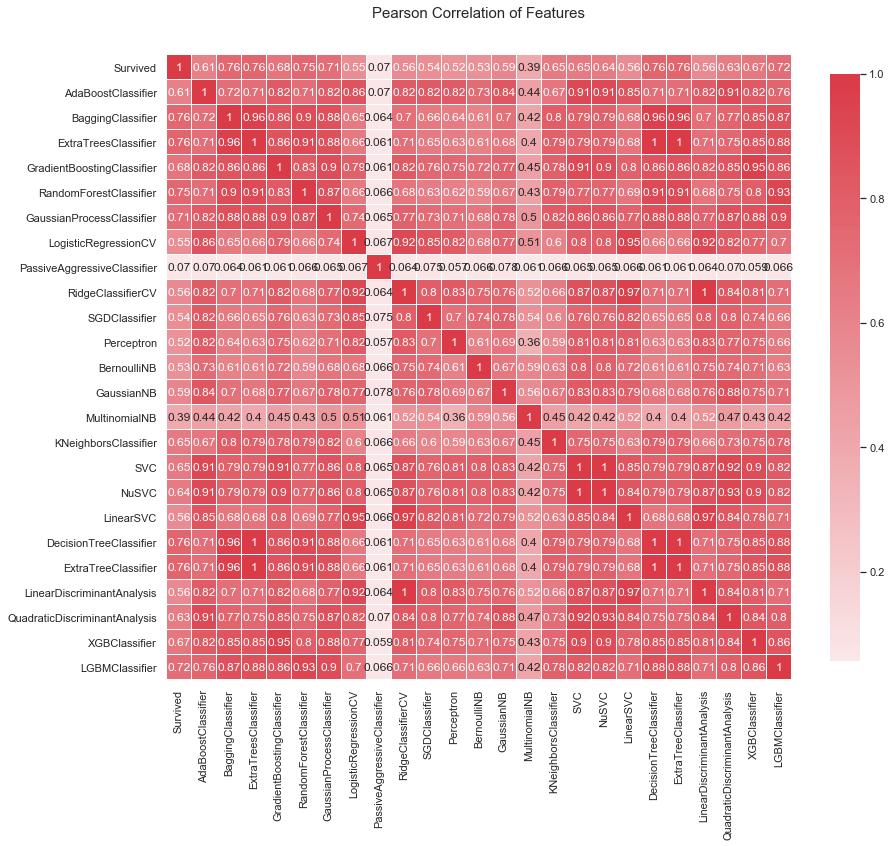

In [55]:
#compare algorithm predictions with each other, where 1 = exactly similar and 0 = exactly opposite
#there are some 1's, but enough blues and light reds to create a "super algorithm" by combining them
correlation_heatmap(MLA_predict)

In the first place, we will use VotingClassifier with almost all of our model (except some of our worst one), and we will visualize the accuracy to see if we improve our performance against our best solo models.

In [60]:

#http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.VotingClassifier.html

vote_est = [
    #Ensemble Methods: http://scikit-learn.org/stable/modules/ensemble.html
    ('ada', ensemble.AdaBoostClassifier()),
    ('bc', ensemble.BaggingClassifier()),
    ('etc',ensemble.ExtraTreesClassifier()),
    ('gbc', ensemble.GradientBoostingClassifier()),
    ('rfc', ensemble.RandomForestClassifier()),

    #Gaussian Processes: http://scikit-learn.org/stable/modules/gaussian_process.html#gaussian-process-classification-gpc
    ('gpc', gaussian_process.GaussianProcessClassifier()),
    
    
    #GLM: http://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
    ('lr', linear_model.LogisticRegressionCV()),
    
    #Navies Bayes: http://scikit-learn.org/stable/modules/naive_bayes.html
    ('bnb', naive_bayes.BernoulliNB()),
    ('gnb', naive_bayes.GaussianNB()),
    ('mnb', naive_bayes.MultinomialNB()),
    
    #Nearest Neighbor: http://scikit-learn.org/stable/modules/neighbors.html
    ('knn', neighbors.KNeighborsClassifier()),
    
    #SVM: http://scikit-learn.org/stable/modules/svm.html
    ('svc', svm.SVC(probability=True)),
    ('NUsvc', svm.NuSVC(probability=True)),
    
    ('Decisiontree', tree.DecisionTreeClassifier(criterion = 'gini', max_depth = 4, random_state = 0)),
    ('Extratree', tree.ExtraTreeClassifier()),
    
    #xgboost: http://xgboost.readthedocs.io/en/latest/model.html
   ('xgb', XGBClassifier()),
    ('lgbm', LGBMClassifier())

]


#Hard Vote or majority rules
vote_hard = ensemble.VotingClassifier(estimators = vote_est , voting = 'hard')
vote_hard_cv = model_selection.cross_validate(vote_hard, data1[data1_x_bin], data1[Target], cv  = cv_split)
vote_hard.fit(data1[data1_x_bin], data1[Target])

print("Hard Voting Training w/bin score mean: {:.2f}". format(vote_hard_cv['train_score'].mean()*100)) 
print("Hard Voting Test w/bin score mean: {:.2f}". format(vote_hard_cv['test_score'].mean()*100))
print("Hard Voting Test w/bin score 3*std: +/- {:.2f}". format(vote_hard_cv['test_score'].std()*100*3))
print('-'*10)


#Soft Vote or weighted probabilities
vote_soft = ensemble.VotingClassifier(estimators = vote_est , voting = 'soft')
vote_soft_cv = model_selection.cross_validate(vote_soft, data1[data1_x_bin], data1[Target], cv  = cv_split)
vote_soft.fit(data1[data1_x_bin], data1[Target])

print("Soft Voting Training w/bin score mean: {:.2f}". format(vote_soft_cv['train_score'].mean()*100)) 
print("Soft Voting Test w/bin score mean: {:.2f}". format(vote_soft_cv['test_score'].mean()*100))
print("Soft Voting Test w/bin score 3*std: +/- {:.2f}". format(vote_soft_cv['test_score'].std()*100*3))
print('-'*10)


Hard Voting Training w/bin score mean: 86.69
Hard Voting Test w/bin score mean: 82.54
Hard Voting Test w/bin score 3*std: +/- 4.56
----------
Soft Voting Training w/bin score mean: 87.42
Soft Voting Test w/bin score mean: 82.61
Soft Voting Test w/bin score 3*std: +/- 4.62
----------


Previously, the best accuracy score was obtained by LGBMClassifier with 87.15 for Training and 82.94 fir Test. That's seems quite similar. Let's see for the AUC :	

In [111]:

#Soft Vote or weighted probabilities
vote_soft = ensemble.VotingClassifier(estimators = vote_est , voting = 'soft')
vote_soft_cv = model_selection.cross_validate(vote_soft, data1[data1_x_bin], data1[Target], scoring = 'roc_auc', cv  = cv_split)
vote_soft.fit(data1[data1_x_bin], data1[Target])

print("Soft Voting Training w/bin auc mean: {:.2f}". format(vote_soft_cv['train_score'].mean()*100)) 
print("Soft Voting Test w/bin auc mean: {:.2f}". format(vote_soft_cv['test_score'].mean()*100))
print("Soft Voting Test w/bin auc 3*std: +/- {:.2f}". format(vote_soft_cv['test_score'].std()*100*3))
print('-'*10)

Soft Voting Training w/bin auc mean: 92.91
Soft Voting Test w/bin auc mean: 88.07
Soft Voting Test w/bin auc 3*std: +/- 5.96
----------


Previously, the best AUC  was obtained by GradientBoostingClassifier with 92.69 for Training and 88.2 fir Test. That's seems quite similar.. again. Overall, the results seems slightly better. But also slightly time expensive. Let's see if we just put our 3 best models whom combine nice accuracy and nice AUC ?
The 3 best models for accuracy AND AUC are :
- GradientBoostingClassifier
- XGBClassifier
- LGBMClassifier. 

In [112]:
vote_est = [
    ('gbc', ensemble.GradientBoostingClassifier()),
    ('xgb', XGBClassifier()),
    ('lgbm', LGBMClassifier())
]


#Hard Vote or majority rules
vote_hard = ensemble.VotingClassifier(estimators = vote_est , voting = 'hard')
vote_hard_cv = model_selection.cross_validate(vote_hard, data1[data1_x_bin], data1[Target], cv  = cv_split)
vote_hard.fit(data1[data1_x_bin], data1[Target])

print("Hard Voting Training w/bin score mean: {:.2f}". format(vote_hard_cv['train_score'].mean()*100)) 
print("Hard Voting Test w/bin score mean: {:.2f}". format(vote_hard_cv['test_score'].mean()*100))
print("Hard Voting Test w/bin score 3*std: +/- {:.2f}". format(vote_hard_cv['test_score'].std()*100*3))
print('-'*10)


#Soft Vote or weighted probabilities
vote_soft = ensemble.VotingClassifier(estimators = vote_est , voting = 'soft')
vote_soft_cv = model_selection.cross_validate(vote_soft, data1[data1_x_bin], data1[Target], cv  = cv_split)
vote_soft.fit(data1[data1_x_bin], data1[Target])

print("Soft Voting Training w/bin score mean: {:.2f}". format(vote_soft_cv['train_score'].mean()*100)) 
print("Soft Voting Test w/bin score mean: {:.2f}". format(vote_soft_cv['test_score'].mean()*100))
print("Soft Voting Test w/bin score 3*std: +/- {:.2f}". format(vote_soft_cv['test_score'].std()*100*3))
print('-'*10)

Hard Voting Training w/bin score mean: 86.29
Hard Voting Test w/bin score mean: 82.76
Hard Voting Test w/bin score 3*std: +/- 4.39
----------
Soft Voting Training w/bin score mean: 86.65
Soft Voting Test w/bin score mean: 82.91
Soft Voting Test w/bin score 3*std: +/- 3.71
----------


In [113]:

#Soft Vote or weighted probabilities
vote_soft = ensemble.VotingClassifier(estimators = vote_est , voting = 'soft')
vote_soft_cv = model_selection.cross_validate(vote_soft, data1[data1_x_bin], data1[Target], scoring = 'roc_auc', cv  = cv_split)
vote_soft.fit(data1[data1_x_bin], data1[Target])

print("Soft Voting Training w/bin auc mean: {:.2f}". format(vote_soft_cv['train_score'].mean()*100)) 
print("Soft Voting Test w/bin auc mean: {:.2f}". format(vote_soft_cv['test_score'].mean()*100))
print("Soft Voting Test w/bin auc 3*std: +/- {:.2f}". format(vote_soft_cv['test_score'].std()*100*3))
print('-'*10)

Soft Voting Training w/bin auc mean: 92.84
Soft Voting Test w/bin auc mean: 88.22
Soft Voting Test w/bin auc 3*std: +/- 7.21
----------


This time, our results seems a little better, and with only models, this is almost instant. It's a alternative. It's seems this VotingClassifier doesn't perform better than LGBM regarding the accuracy but LGBM perform worst than our VotingClassifier for the AUC, overall our VotingClassifier perform better in regards of the metric AUC and I tend to be a person who favours AUC so for me, this alternative seems better.

Let's see if we can optimise with some hyperparameter tuning, I will use it just for :

- GradientBoostingClassifier
- XGBClassifier
- LGBMClassifier

Let's define a function to obtain some information on our GridSearchCV :

In [122]:
def algo(algorithm,x_train,y_train,parameters) :
    
    classifier = GridSearchCV(algorithm, parameters, scoring = 'roc_auc')
    classifier=classifier.fit(x_train,y_train)
    print(algorithm)
    #print("\n Résultats de GridSearchCV : \n",pd.DataFrame(classifier.cv_results_))
    #print("\n Best estimator : \n", classifier.best_estimator_)
    print("\n Best Parameter : \n", classifier.best_params_)
    print("\n Best Score (mean) : \n", classifier.best_score_)
    print("\n Best std (mean) : \n", classifier.cv_results_['std_test_score'][classifier.best_index_])

#### LightGBM

In [138]:
parameters = {'max_depth' : [-1, 0, 1 ,2 ,3, 4, 5, 6, 7, 8],
             'n_estimators' : range(50,1000,50),
             'learning_rate' : [0.1, 0.05, 0.02, 0.01]}

classifier = LGBMClassifier()

algo(classifier,data1[data1_x_bin], data1[Target],parameters)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        importance_type='split', learning_rate=0.1, max_depth=-1,
        min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
        n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
        random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
        subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

 Best Parameter : 
 {'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 200}

 Best Score (mean) : 
 0.8715127983894161

 Best std (mean) : 
 0.026094844115174293


#### XGBoost

In [141]:
parameters = {'max_depth' : range(1,9,1),
             'n_estimators' : range(50,1000,50),
             'learning_rate' : [0.1, 0.05, 0.02, 0.01]}

classifier = XGBClassifier()

algo(classifier,data1[data1_x_bin], data1[Target],parameters)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

 Best Parameter : 
 {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 300}

 Best Score (mean) : 
 0.8775045537340618

 Best std (mean) : 
 0.03104143497122949


#### Gradient Boosting

In [142]:
parameters = {'max_depth' : [4, 6, 8],
             'n_estimators' : range(150,700,50),
             'learning_rate' : [0.1, 0.05, 0.02, 0.01]}

classifier = GradientBoostingClassifier()

algo(classifier,data1[data1_x_bin], data1[Target],parameters)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

 Best Parameter : 
 {'learning_rate': 0.02, 'max_depth': 4, 'n_estimators': 150}

 Best Score (mean) : 
 0.8755871920237752

 Best std (mean) : 
 0.02840897898611194


In [143]:
vote_est = [
    ('gbc', ensemble.GradientBoostingClassifier(learning_rate = 0.02, max_depth = 4, n_estimators = 150)),
    ('xgb', XGBClassifier(learning_rate = 0.01, max_depth = 3, n_estimators = 300)),
    ('lgbm', LGBMClassifier(learning_rate = 0.1, max_depth = 2, n_estimators = 200))
]


#Hard Vote or majority rules
model = ensemble.VotingClassifier(estimators = vote_est , voting = 'soft').fit(data1[data1_x_bin], data1[Target])

<a id="7"></a>
## Step 7 : Producing the Submission file

Finally having trained and fit all our best models, we can now output the predictions into the proper format for submission to the Titanic competition as follows:

In [146]:
predictions = model.predict(data_val[data1_x_bin])

In [152]:
# Generate Submission File 
Submission = pd.DataFrame({ 'PassengerId': data_val['PassengerId'],
                            'Survived': predictions })
Submission.to_csv("Submission.csv", index=False)

I obtained 0.77033 submission accuracy, which I found quite low so I tried another methods I found on Kaggle : HyperparameterTuning on DecisionTreeClassifier. Let's see if I can Improve, even a little !

In [157]:
#base model
dtree = tree.DecisionTreeClassifier(random_state = 0)
base_results = model_selection.cross_validate(dtree, data1[data1_x_bin], data1[Target], cv  = cv_split)
dtree.fit(data1[data1_x_bin], data1[Target])

print('BEFORE DT Parameters: ', dtree.get_params())
print("BEFORE DT Training w/bin score mean: {:.2f}". format(base_results['train_score'].mean()*100)) 
print("BEFORE DT Test w/bin score mean: {:.2f}". format(base_results['test_score'].mean()*100))
print("BEFORE DT Test w/bin score 3*std: +/- {:.2f}". format(base_results['test_score'].std()*100*3))
#print("BEFORE DT Test w/bin set score min: {:.2f}". format(base_results['test_score'].min()*100))
print('-'*10)


#tune hyper-parameters: http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier
param_grid = {'criterion': ['gini', 'entropy'],
              'splitter': ['best', 'random'], 
              'max_depth': [2,4,6,8,10,None], 
              'min_samples_split': [2,5,10,.03,.05], 
              'min_samples_leaf': [1,5,10,.03,.05], 
              'max_features': [None, 'auto'],
              'random_state': [0] }




tune_model = model_selection.GridSearchCV(tree.DecisionTreeClassifier(),
                                          param_grid=param_grid,
                                          scoring = 'roc_auc',
                                          cv = cv_split)
tune_model.fit(data1[data1_x_bin], data1[Target])


print('AFTER DT Parameters: ', tune_model.best_params_)

print("AFTER DT Training w/bin score mean: {:.2f}". format(tune_model.cv_results_['mean_train_score'][tune_model.best_index_]*100)) 

print("AFTER DT Test w/bin score mean: {:.2f}". format(tune_model.cv_results_['mean_test_score'][tune_model.best_index_]*100))
print("AFTER DT Test w/bin score 3*std: +/- {:.2f}". format(tune_model.cv_results_['std_test_score'][tune_model.best_index_]*100*3))
print('-'*10)

BEFORE DT Parameters:  {'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'presort': False, 'random_state': 0, 'splitter': 'best'}
BEFORE DT Training w/bin score mean: 89.51
BEFORE DT Test w/bin score mean: 82.09
BEFORE DT Test w/bin score 3*std: +/- 5.57
----------
AFTER DT Parameters:  {'criterion': 'gini', 'max_depth': 4, 'max_features': None, 'min_samples_leaf': 5, 'min_samples_split': 2, 'random_state': 0, 'splitter': 'best'}
AFTER DT Training w/bin score mean: 89.25
AFTER DT Test w/bin score mean: 87.68
AFTER DT Test w/bin score 3*std: +/- 6.00
----------


In [159]:
model1 = DecisionTreeClassifier(criterion = 'gini',
                                max_depth = 4, max_features = None,
                                min_samples_leaf = 5,
                                min_samples_split = 2,
                                random_state = 0,
                                splitter = 'best')
model1.fit(data1[data1_x_bin], data1[Target])

predictions1 = model1.predict(data_val[data1_x_bin])

In [163]:
# Generate Submission File 
Submission2 = pd.DataFrame({ 'PassengerId': data_val['PassengerId'],
                            'Survived': predictions1 })
Submission2.to_csv("Submission2.csv", index=False)

I obtained 0.77990 submission accuracy with this one and make me earn 3,256 places on the leaderboard !

<a id="8"></a>
## Conclusion
My work seems to converge on 0.77 submission accuracy. Using the same dataset and different models with tuning does not exceed the 0.77990 submission accuracy. Interesting for this dataset, the simple decision tree algorithm had the best default submission score and with tuning achieved the same best accuracy score.

The train dataset has a different distribution than the test/validation dataset and population. This created wide margins between the cross validation (CV) accuracy score and Kaggle submission accuracy score.

With that in mind, maybe next time I would spend more time on preprocessing and feature engineering. In order to better align the CV score and Kaggle score and improve the overall accuracy.
